### Unzip files

In [ ]:
!unzip ml_on_the_rescue

### Looking at architecture.py

It's defining a bigram language model. Presumably the weights are in the `.pt` file.

### Looking at bigram_model.pt

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
w = torch.load('bigram_model.pt')['token_embedding_table.weight']

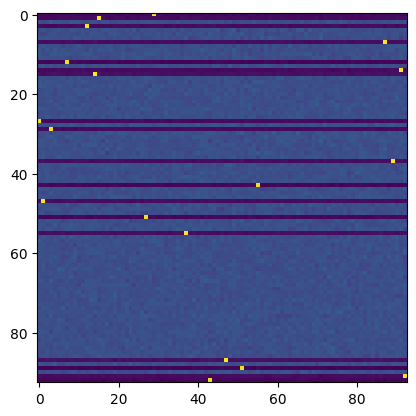

In [3]:
plt.imshow(w)
plt.show()

Looks like some hot spots here and there. I think we'll just have to input "HT" and then follow the chain. Hopefully our output has a "B" in it.

### Set up the model

In [4]:
import architecture

In [5]:
model = architecture.BigramLanguageModel(len(architecture.vocab))
for p in model.parameters():
    p.data = w

Mess around

In [6]:
architecture.vocab.index('H'), architecture.vocab.index('T')

(43, 55)

In [7]:
out = model(torch.Tensor([43, 55]).long())
_, output = torch.max(out, 1)
architecture.vocab[output[0]], architecture.vocab[output[1]]

('T', 'B')

Looks promising.

### Solution

In [8]:
output1 = 'H'
output2 = 'T'
print('HT', end='')
while output2 != '}':
    output = model(torch.Tensor([architecture.vocab.index(output1), architecture.vocab.index(output2)]).long())
    _, output = torch.max(output, 1)
    output1 = output2
    output2 = architecture.vocab[output[1]]
    print(output2, end='')

HTB{Pr0t3c7_L1fe}